<a href="https://colab.research.google.com/github/vinceriot/computervision/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0_%D0%9B%D0%B0%D0%BD%D0%B4%D1%88%D0%B0%D1%84%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2. Визуализация градиентного спуска. Ландшафты потерь. Оптимайзеры.

Голдобин Денис ФИТ-1-21


In [ ]:
# готовим функцию для красивой отрисовки градиента
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective,
                  x_lims=[-200.0, 202.0],
                  y_lims=[-200.0, 202.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [ ]:
# расcчитаем градиентный спуск для фунции для 10 cумма(x^2), x = тензор 1 на 2. Инициализирован значением 8
import torch

# тензор
x = torch.tensor(
    [200.,200.], requires_grad=True)

# сюда будем складывать значения тензора x при каждом шаге градиентного спуска
var_history = []

# сюда будем складывать значения функции при каждом шаге градиентного спуска
fn_history = []

# определяем функцию.
def function_parabola(variable):
    return 10 * (variable ** 2).sum()

# считаем шаг градиентного спуска
lr = 0.01
def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    variable.data -= lr * variable.grad
    variable.grad.zero_()

# реализуем градиентный спуск, думаем, что за 500 шагов справимся, и найдем минимум функции.
for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

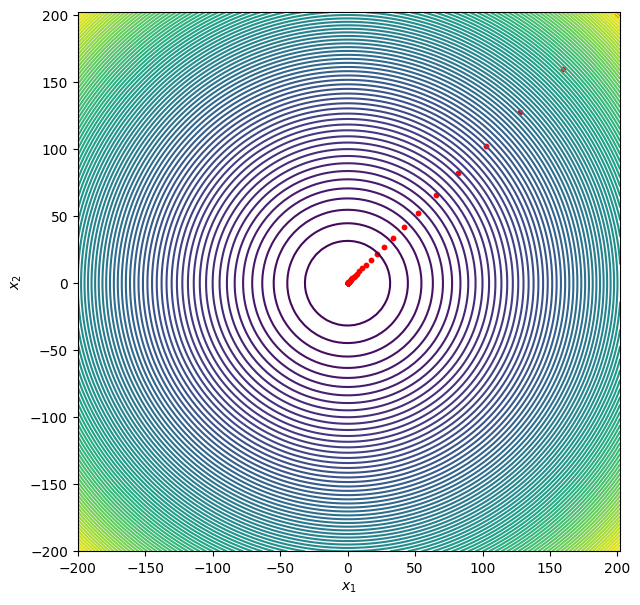

In [ ]:
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

## Задание 1. Сделайте трехмерную визуализацию сходимости градиентного спуска. Нарисуйте поверхность функции двух переменных для которой осуществлялся поиск минимума методом градиентного спуска. Отдельными точками другого цвета изобразите позиции которые рассматривались на каждом шаге градиентного спуска.

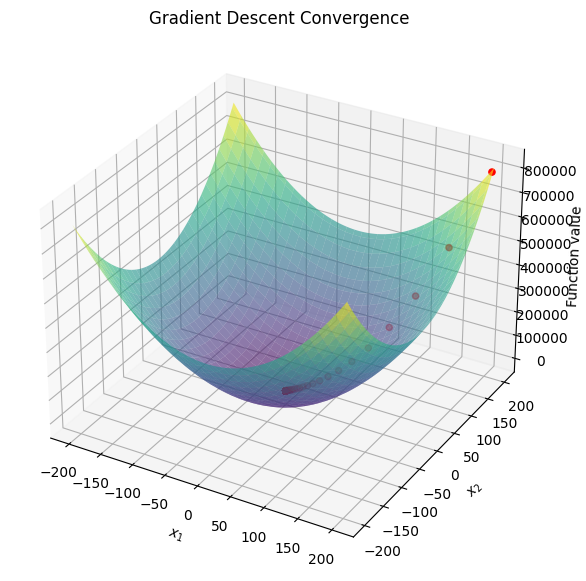

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def show_3d_surface(objective,
                    x_lims=[-200.0, 202.0],
                    y_lims=[-200.0, 202.0],
                    x_ticks=100,
                    y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    Z = np.zeros_like(X)

    for x_index in range(X.shape[0]):
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            Z[x_index, y_index] = objective(np.array([[x_val, y_val]]).T)

    # Переходим к визуализации
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Рисуем поверхность функции
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

    # Добавляем точки, пройденные на каждом шаге
    history = np.array(var_history)
    function_values = np.array(fn_history)
    ax.scatter(history[:, 0], history[:, 1], function_values, color='r', s=20)

    # Настройки осей
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('Function value')
    ax.set_title('Gradient Descent Convergence')
    plt.show()

# Отобразим трехмерную визуализацию
show_3d_surface(function_parabola)


### КОД ЛАБОРАТОРНОЙ №1

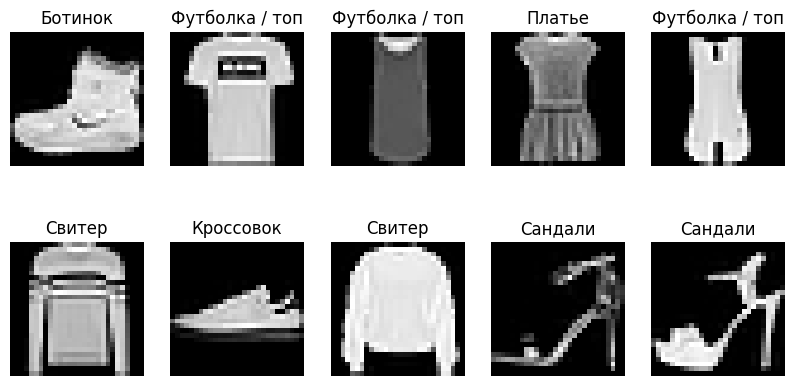

image:
tensor([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,   0,
           0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187, 149,
         135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221, 197,
         146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187, 190,
         188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168, 173,
         174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,   0,   0],
        [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180, 184,
         178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,   0,   0],
        [  0,   0,   0,   0,  35, 177, 

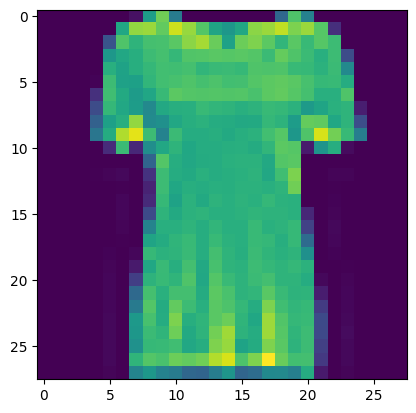

tensor(0)


In [ ]:
# импортируем библиотеки

import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]
import torchvision.datasets

# загружаем сразу в трайн и тест
MNIST_train = torchvision.datasets.FashionMNIST ('./', download=True, train=True)
MNIST_test = torchvision.datasets.FashionMNIST ('./', download=True, train=False)
# формируем датасеты для обучения, тестирования, целевые переменные
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels
# Функция для отображения изображений
def show_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

# Пример вывода 10 изображений с названиями
show_images(X_train, y_train, class_names)
# сколько изображений в трейне и тесте
len(y_train), len(y_test)
# нарисуем, c чем мы имеем дело
import matplotlib.pyplot as plt

im_number = 10

# вот как хранятся изображения в компьютере
print(f"image:\n{X_train[im_number, :, :]}")

# а так их видим мы
plt.imshow(X_train[im_number, :, :])

plt.show()
print(y_train[im_number])
# посмотртим тип "картинок"
type(X_train[10, :, :])
X_train.shape
# unsqueeze - Возвращает новый тензор с увеличенной на 1 размерностью, которая вставляется в указанную позицию.
# было torch.Size([60000, 28, 28])  ---- станет torch.Size([60000, 1, 28, 28])
# и все значения - во float

X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()
X_train.shape
X_test.shape
# Определяем класс, которые и будет представлять нашу нейронку
# какие слои - см описание вначале блокнота

class LeNet5(torch.nn.Module):
    # конструктор. Определям вообще какие слои у нас будут
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()

        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()

        self.fc3   = torch.nn.Linear(84, 10)

    # наша самая главная функция. Определяем, что и в каком порядке будет вызываться
    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

# переменная - наша нейронка
lenet5 = LeNet5()
# определяем, где будет обучаться наша СNN
# если есть граф процессор от Nvidia, то на нем. Если нет, то на cpu

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = "cpu"

# отправляем туда нашу нейронку
lenet5 = lenet5.to(device)
# в качестве функции потерь будем использовать CrossEntropyLoss()
loss = torch.nn.CrossEntropyLoss()

# в качестве оптимайзера, который будет вычислять градиенты и минимизировать функцию потерь, будем использовать Adam (Адаптивная оценка момента)
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

## Задание 2. Для своего кода лабораторной работы №1 примените три разных оптимайзера. Постройте графики зависимости величины функции потерь от номера эпохи для всех трех оптимайзеров на одном графике сначала для обучающей выборки, потом для тестовой.

Training with Adam
Adam epoch 0 - test loss: 2.314074993133545 
Adam epoch 1 - test loss: 2.314074993133545 
Adam epoch 2 - test loss: 2.314074993133545 
Adam epoch 3 - test loss: 2.314074993133545 
Adam epoch 4 - test loss: 2.314074993133545 
Training with SGD
SGD epoch 0 - test loss: 2.3048200607299805 
SGD epoch 1 - test loss: 2.3048200607299805 
SGD epoch 2 - test loss: 2.3048200607299805 
SGD epoch 3 - test loss: 2.3048200607299805 
SGD epoch 4 - test loss: 2.3048200607299805 
Training with RMSprop
RMSprop epoch 0 - test loss: 2.2956831455230713 
RMSprop epoch 1 - test loss: 2.2956831455230713 
RMSprop epoch 2 - test loss: 2.2956831455230713 
RMSprop epoch 3 - test loss: 2.2956831455230713 
RMSprop epoch 4 - test loss: 2.2956831455230713 


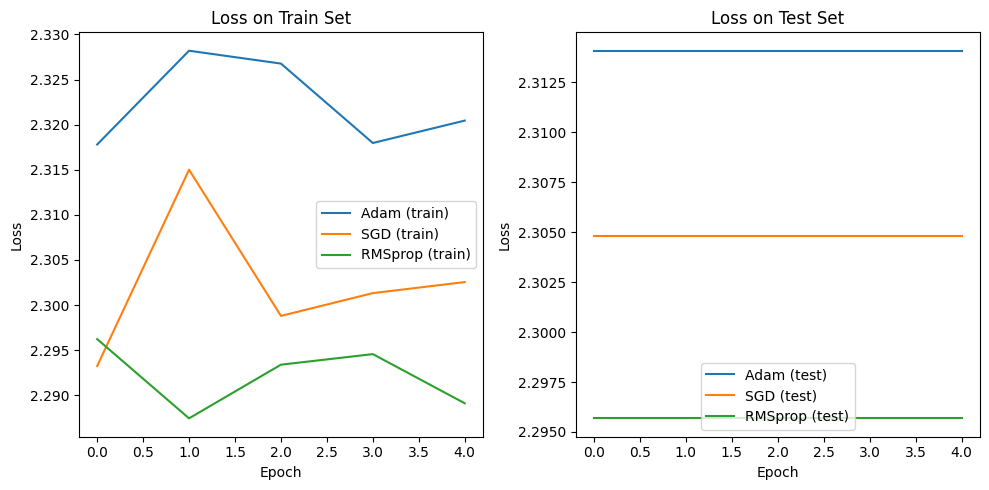

In [ ]:
# Функция для тренировки модели
def train_model(optimizer, optimizer_name, num_epochs=5, batch_size=5):
    test_accuracy_history = []
    test_loss_history = []
    train_loss_history = []

    for epoch in range(num_epochs):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index+batch_size]
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
            preds = lenet5.forward(X_batch)
            loss_value = loss(preds, y_batch)
            loss_value.backward()
            optimizer.step()

        train_loss_history.append(loss_value.data.cpu())
        test_preds = lenet5.forward(X_test)
        test_loss_value = loss(test_preds, y_test).data.cpu()  # Считаем лосс для тестовой выборки
        test_loss_history.append(test_loss_value)
        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)

        print(f"{optimizer_name} epoch {epoch} - test loss: {test_loss_value} ")  # Выводим значение функции потерь

    return train_loss_history, test_loss_history, test_accuracy_history

# Теперь можно вызывать функцию train_model с параметром batch_size
batch_size = 100  # Определяем размер батча

# Обучаем модель с тремя разными оптимайзерами
optimizers = {
    "Adam": optim.Adam(lenet5.parameters(), lr=1.0e-3),
    "SGD": optim.SGD(lenet5.parameters(), lr=1.0e-3),
    "RMSprop": optim.RMSprop(lenet5.parameters(), lr=1.0e-3)
}

# Словарь для хранения истории
history = {}

for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name}")
    lenet5 = LeNet5().to(device)  # Создаем новую модель для каждого оптимайзера
    train_loss, test_loss, test_accuracy = train_model(opt, opt_name, num_epochs=5, batch_size=batch_size)
    history[opt_name] = {"train_loss": train_loss, "test_loss": test_loss, "test_accuracy": test_accuracy}

# Построение графиков
plt.figure(figsize=(10, 5))

# График для обучающей выборки
plt.subplot(1, 2, 1)
for opt_name in optimizers.keys():
    plt.plot(history[opt_name]["train_loss"], label=f'{opt_name} (train)')
plt.title('Loss on Train Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для тестовой выборки
plt.subplot(1, 2, 2)
for opt_name in optimizers.keys():
    plt.plot(history[opt_name]["test_loss"], label=f'{opt_name} (test)')
plt.title('Loss on Test Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Задание 3. Изучите статью https://habr.com/ru/companies/skillfactory/articles/536606/. Попробуйте воспроизвести ее результаты в своем коде. Если не получится сделать анимацию, можно те же графики оставить статическими.

In [ ]:
!pip install celluloid

In [ ]:
# Пример для отслеживания весов по допустимым индексам
weights_w1 = []
weights_w2 = []
costs = []

def train_model_with_logging(optimizer, num_epochs=5, batch_size=100):
    for epoch in range(num_epochs):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index + batch_size]
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
            preds = lenet5.forward(X_batch)
            loss_value = loss(preds, y_batch)
            loss_value.backward()
            optimizer.step()

            # Логируем изменения весов на допустимых индексах
            weights_w1.append(lenet5.fc2.weight[10][20].item())  # Допустимые индексы
            weights_w2.append(lenet5.fc2.weight[15][25].item())  # Допустимые индексы
            costs.append(loss_value.item())

        print(f"Epoch {epoch + 1}, Loss: {loss_value.item()}")

# Обучение модели с логированием
lenet5 = LeNet5().to(device)
optimizer = optim.Adam(lenet5.parameters(), lr=1.0e-3)
train_model_with_logging(optimizer, num_epochs=10, batch_size=100)


Epoch 1, Loss: 0.3660387098789215
Epoch 2, Loss: 0.2577555477619171
Epoch 3, Loss: 0.4114229679107666
Epoch 4, Loss: 0.21426787972450256
Epoch 5, Loss: 0.2836611568927765
Epoch 6, Loss: 0.36472415924072266
Epoch 7, Loss: 0.25984930992126465
Epoch 8, Loss: 0.21775184571743011
Epoch 9, Loss: 0.19487932324409485
Epoch 10, Loss: 0.22610445320606232


In [ ]:
pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

# Пример использования данных потерь и весов для анимации
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
camera = Camera(fig)

# Параметры для настройки анимации
line_style = ["dashed", "dashdot", "dotted"]
fontsize_ = 27
labelsize_ = 17
ax.view_init(elev=30, azim=-10)
ax.set_xlabel(r'$w_1$', fontsize=fontsize_, labelpad=17)
ax.set_ylabel(r'$w_2$', fontsize=fontsize_, labelpad=5)
ax.set_zlabel("cost", fontsize=fontsize_, labelpad=-35)
ax.tick_params(axis='x', pad=12, which='major', labelsize=labelsize_)
ax.tick_params(axis='y', pad=0, which='major', labelsize=labelsize_)
ax.tick_params(axis='z', pad=8, which='major', labelsize=labelsize_)

# Сгенерируем случайные данные для демонстрации анимации
weights_w1 = np.random.uniform(-10, 10, 100)
weights_w2 = np.random.uniform(-10, 10, 100)
costs = np.linspace(0, 10, 100)

# Параметры для surface plot (ландшафт потерь)
w1_vals, w2_vals = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
cost_vals = np.sin(w1_vals) ** 2 + np.cos(w2_vals) ** 2  # Пример ландшафта потерь

# Создаем анимацию
for i in range(100):
    # Линии траекторий градиентного спуска
    ax.plot(weights_w1[:i], weights_w2[:i], costs[:i], linestyle=line_style[0], color="black", linewidth=2)

    # Добавляем точки на каждой итерации как линии
    ax.plot([weights_w1[i]], [weights_w2[i]], [costs[i]], 'ro')  # Красная точка

    # Ландшафт потерь
    ax.plot_surface(w1_vals, w2_vals, cost_vals, cmap=cm.terrain, alpha=0.5, rstride=1, cstride=1)

    camera.snap()

# Создание и сохранение анимации
animation = camera.animate(interval=50, repeat=False)
writer = PillowWriter(fps=20)
animation.save("gd_animation_fixed.gif", writer=writer)


Колаб не выдаёт гиф, но pycharm скомпилировал 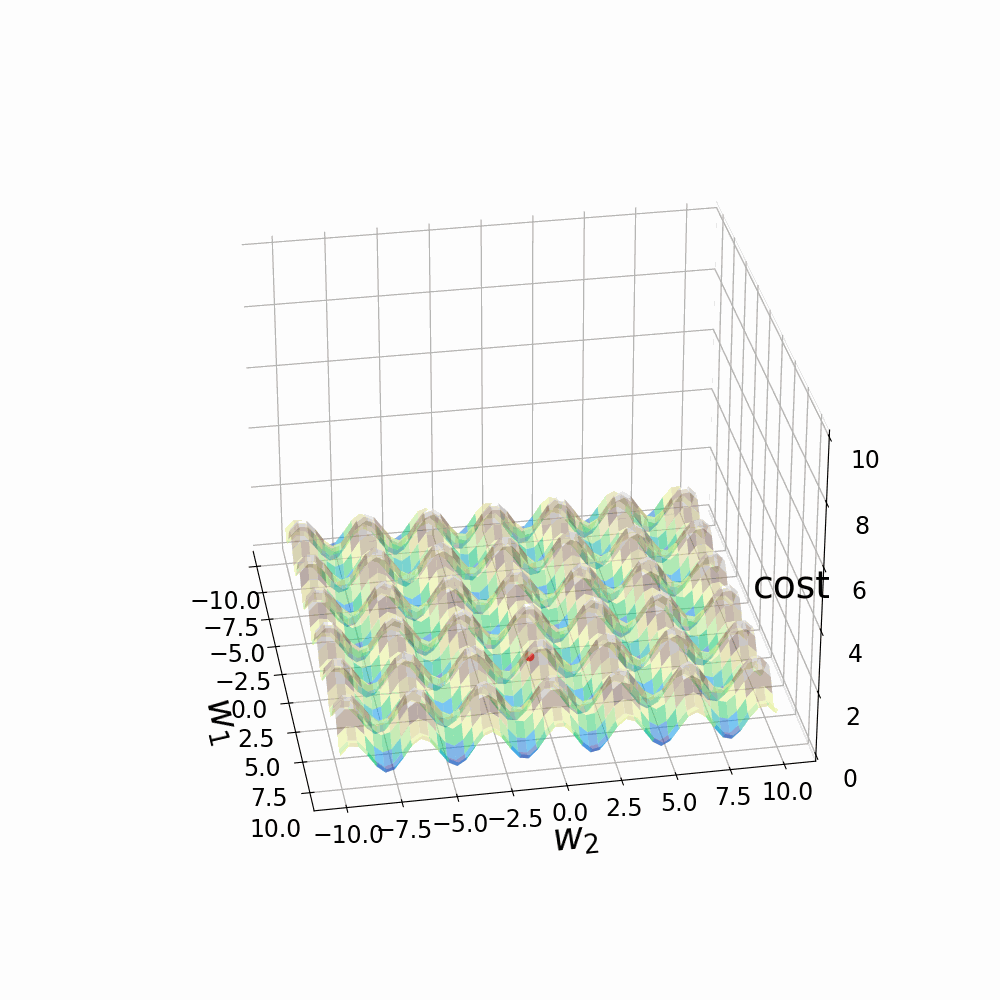

## Задание 4. В коде, полученном после выполнения задания 3, релизуйте по формулам один из оптимайзеров. Как изменится визуализация поиска минимума из тех же трех точек?

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from celluloid import Camera

# Параметры для анимации
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
camera = Camera(fig)

# Настройки анимации
line_style = ["dashed", "dashdot", "dotted"]
fontsize_ = 27
labelsize_ = 17
ax.view_init(elev=30, azim=-10)
ax.set_xlabel(r'$w_1$', fontsize=fontsize_, labelpad=17)
ax.set_ylabel(r'$w_2$', fontsize=fontsize_, labelpad=5)
ax.set_zlabel("cost", fontsize=fontsize_, labelpad=-35)
ax.tick_params(axis='x', pad=12, which='major', labelsize=labelsize_)
ax.tick_params(axis='y', pad=0, which='major', labelsize=labelsize_)
ax.tick_params(axis='z', pad=8, which='major', labelsize=labelsize_)

# Генерация данных
weights_w1 = [np.random.uniform(-10, 10)]
weights_w2 = [np.random.uniform(-10, 10)]
costs = []

# Ландшафт потерь
w1_vals, w2_vals = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
cost_vals = np.sin(w1_vals) ** 2 + np.cos(w2_vals) ** 2  # Пример ландшафта потерь


# Функция потерь
def compute_cost(w1, w2):
    return np.sin(w1) ** 2 + np.cos(w2) ** 2


# Градиенты
def compute_gradients(w1, w2):
    grad_w1 = 2 * np.sin(w1) * np.cos(w1)  # Частная производная по w1
    grad_w2 = -2 * np.sin(w2) * np.cos(w2)  # Частная производная по w2
    return grad_w1, grad_w2


# Параметры градиентного спуска
learning_rate = 0.1
num_iterations = 100

for _ in range(num_iterations):
    current_w1 = weights_w1[-1]
    current_w2 = weights_w2[-1]

    # Вычисляем значение функции потерь
    current_cost = compute_cost(current_w1, current_w2)
    costs.append(current_cost)

    # Обновляем веса
    grad_w1, grad_w2 = compute_gradients(current_w1, current_w2)
    new_w1 = current_w1 - learning_rate * grad_w1
    new_w2 = current_w2 - learning_rate * grad_w2

    weights_w1.append(new_w1)
    weights_w2.append(new_w2)

    # Линии градиентного спуска
    ax.plot(weights_w1[:-1], weights_w2[:-1], costs, linestyle=line_style[0], color="black", linewidth=2)
    ax.plot(weights_w1[-1], weights_w2[-1], current_cost, 'ro')  # Красная точка

    # Ландшафт потерь
    ax.plot_surface(w1_vals, w2_vals, cost_vals, cmap=cm.terrain, alpha=0.5, rstride=1, cstride=1)

    camera.snap()

# Сохранение анимации
animation = camera.animate(interval=50, repeat=False)
animation.save("gd_animation_with_gradient_descent.gif", writer='pillow')


Колаб не генирирует гиф

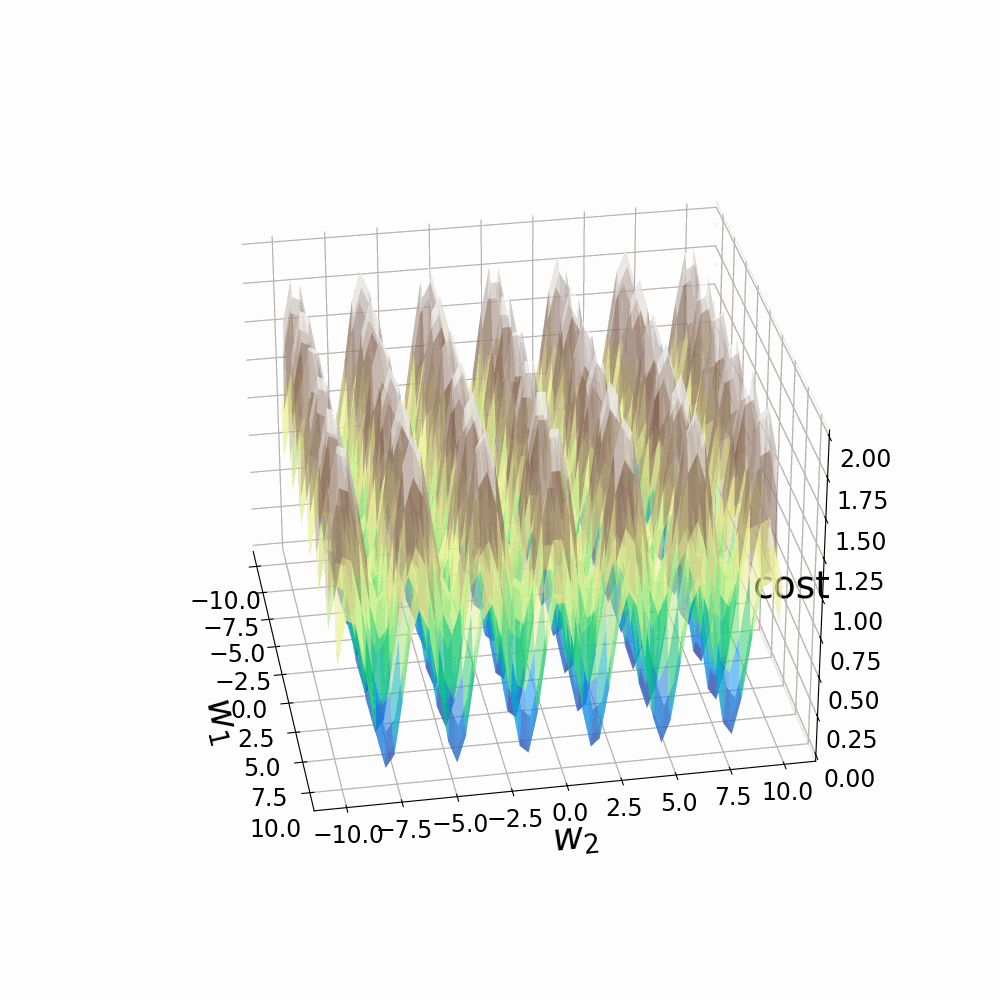